# Importação das bibliotecas necessárias

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import joblib

# Configurações de estilo para gráficos

In [33]:
sns.set(style="whitegrid")

# Carregar os dados

In [34]:
df = pd.read_csv('kc_house_data(1).csv')

# Exibir as primeiras linhas e resumo dos dados

In [35]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


---
# Limpeza de Dados
---

# Verificar se há valores ausentes

In [36]:
print("Valores ausentes por coluna:\n", df.isnull().sum())

Valores ausentes por coluna:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Análise visual das variáveis para entender a distribuição

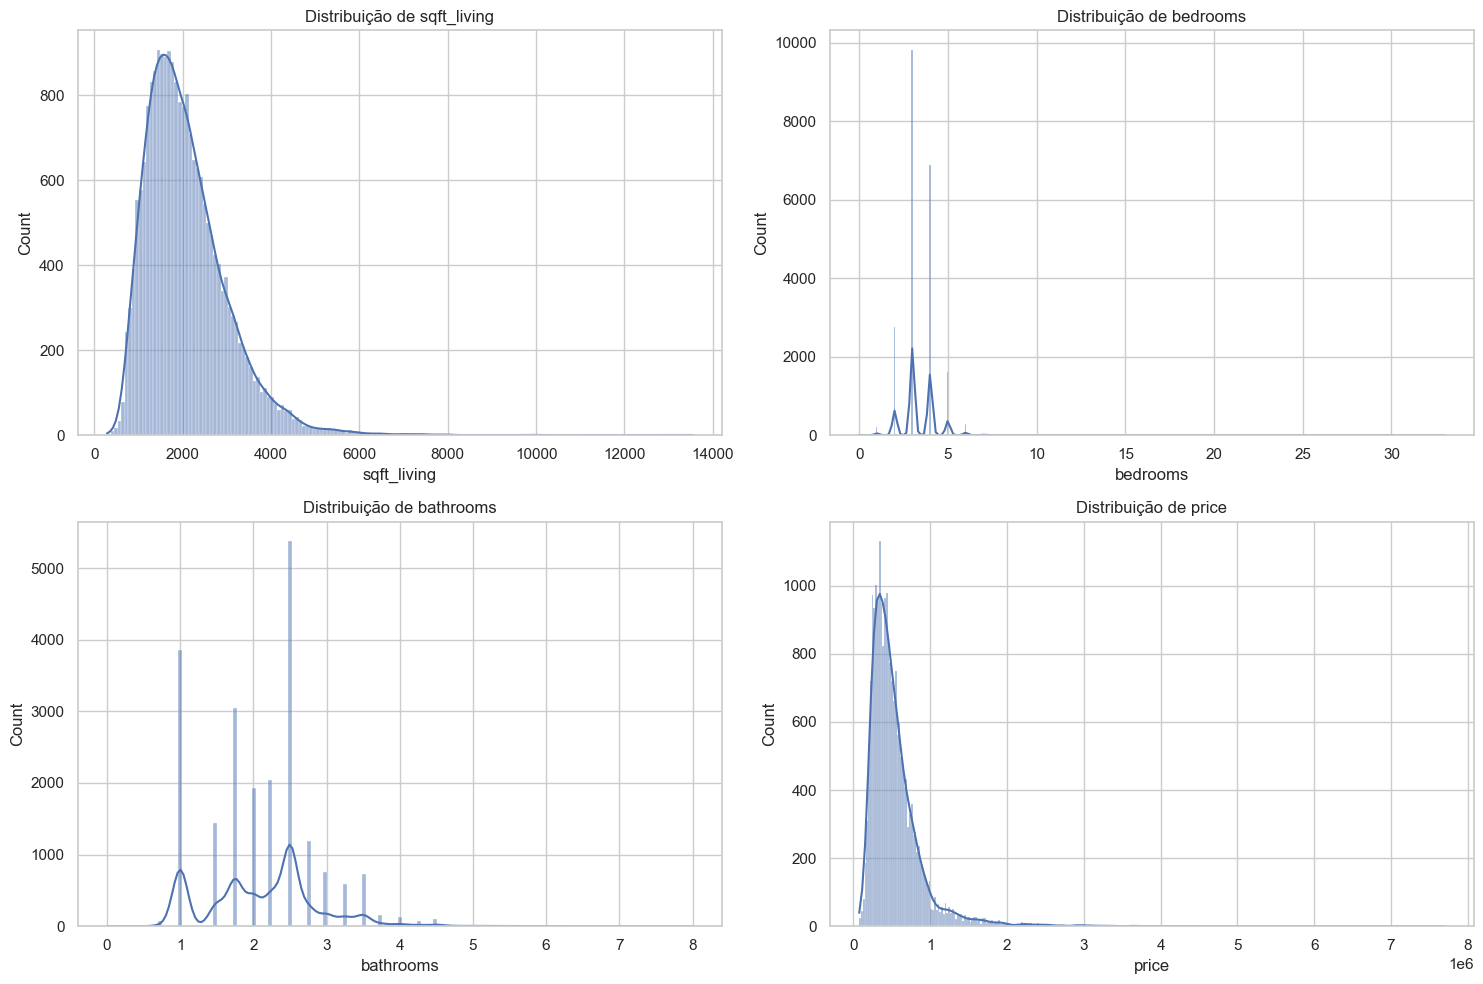

In [37]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['sqft_living', 'bedrooms', 'bathrooms', 'price']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Remover colunas não numéricas para calcular a correlação

In [38]:
df_numeric = df.select_dtypes(include=[np.number])

# Visualizar a correlação entre variáveis numéricas

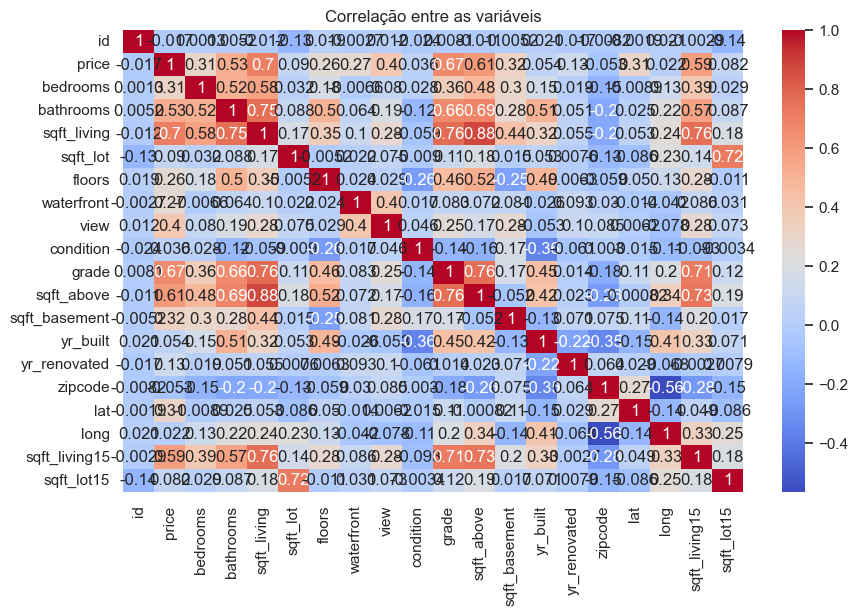

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre as variáveis")
plt.show()

# Remover ou preencher valores ausentes, se houver

In [40]:
df = df.dropna()

---
# Modelo de Regressão Linear
---

O modelo de Regressão Linear é treinado com as variáveis preditoras (sqft_living, bedrooms, bathrooms e idade) para prever o preço da casa.
É calculado o RMSE (Root Mean Squared Error), que indica o erro médio na previsão dos preços, permitindo avaliar a precisão do modelo.
Previsões para Novas Casas: São geradas previsões de preços para novas casas, facilitando a tomada de decisões para usuários interessados em avaliar o valor de propriedades com características específicas.

# Calcule a idade da casa

In [41]:
current_year = datetime.now().year
df['idade'] = current_year - df['yr_built']

# Definir as variáveis independentes (features) e a variável dependente (target)

In [42]:
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'idade']]
y = df['price']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Fazendo previsões

In [45]:
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 262985.9758719034


# Verificação do RMSE abaixo de 69.000 e ajuste, se necessário

In [ ]:
if rmse > 69000:
    print("RMSE está acima de 69.000. Considerando transformações nos dados para melhoria...")
    # Transformação logarítmica no preço
    y_log = np.log1p(y)
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
    
    # Treinamento do modelo com preço log-transformado
    model.fit(X_train, y_train_log)
    y_pred_log = model.predict(X_test)
    
    # Recalculando o RMSE com a transformação
    rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
    print(f"Novo RMSE com transformação logarítmica: {rmse_log}")
else:
    print("RMSE já está dentro do limite desejado.")

RMSE está acima de 69.000. Considerando transformações nos dados para melhoria...
Novo RMSE com transformação logarítmica: 0.3685820290186963


# Fazendo previsões para novas casas (exemplo de dados)

In [48]:
novas_casas = pd.DataFrame({
    'sqft_living': [2000, 1500],
    'bedrooms': [3, 2],
    'bathrooms': [2, 1],
    'idade': [10, 15]
})

# Previsão com o modelo ajustado
if rmse > 69000:
    precos_previstos = np.expm1(model.predict(novas_casas))
else:
    precos_previstos = model.predict(novas_casas)

for i, preco in enumerate(precos_previstos):
    print(f"Preço previsto para a casa {i + 1}: R$ {preco:,.2f}")

Preço previsto para a casa 1: R$ 379,550.14
Preço previsto para a casa 2: R$ 292,559.73


# Salvando o modelo

In [17]:
joblib.dump(model, 'modelo_regressao_linear.pkl')

['modelo_regressao_linear.pkl']

---
# Implementação do Algoritmo de Agrupamento (K-means)
---

Utiliza-se K-Means para criar grupos de casas com características similares (sqft_living, bedrooms, bathrooms). Esse agrupamento ajuda a identificar padrões e segmentos de mercado, como casas de alto padrão, médio padrão e baixo padrão.
O resultado é visualizado em um gráfico de dispersão que mostra a relação entre a área da casa e o preço, com cores diferentes para cada cluster.

# Selecionando as colunas relevantes para o agrupamento

In [18]:
X_cluster = df[['sqft_living', 'bedrooms', 'bathrooms']]

# Normalizando os dados

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Definindo o número de clusters

In [20]:
num_clusters = 3

# Aplicando o K-means

In [21]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# Adicionando os rótulos dos clusters ao DataFrame original

df['cluster'] = kmeans.labels_

In [22]:
df['cluster'] = kmeans.labels_

# Visualizando os clusters

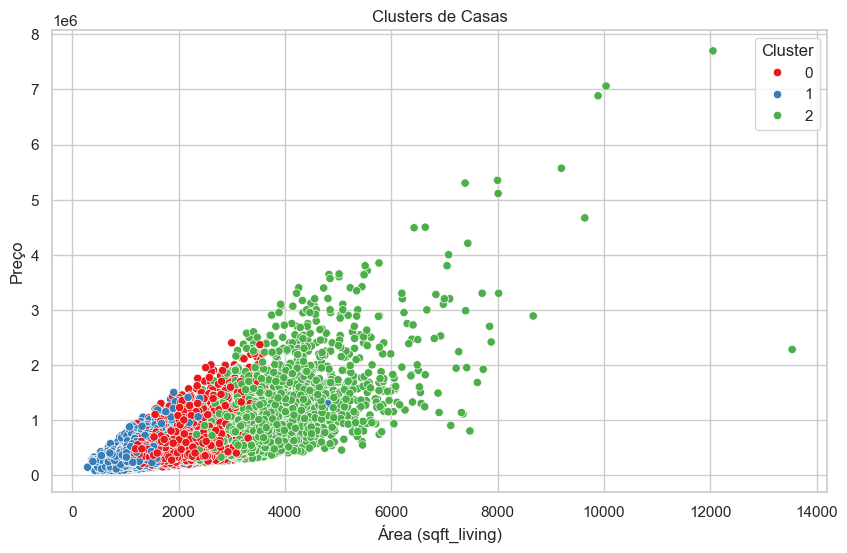

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='cluster', palette='Set1')
plt.title('Clusters de Casas')
plt.xlabel('Área (sqft_living)')
plt.ylabel('Preço')
plt.legend(title='Cluster')
plt.show()

---
# Modelo de Classificação
---

O modelo de Árvore de Decisão é treinado para prever a qual cluster uma casa pertence, com base nas mesmas variáveis (sqft_living, bedrooms, bathrooms).
São geradas a matriz de confusão e o relatório de classificação, que permitem avaliar a precisão do modelo ao classificar corretamente as casas nos clusters.

# Separando as variáveis independentes e dependentes

In [24]:
X_class = df[['sqft_living', 'bedrooms', 'bathrooms']]
y_class = df['cluster']  # Usando os clusters como variável dependente

# Dividindo os dados em conjuntos de treinamento e teste

In [25]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Criando e treinando o modelo de árvore de decisão

In [26]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

# Fazendo previsões

In [27]:
y_pred_class = classifier.predict(X_test_class)

# Avaliando o modelo

In [28]:
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

[[2039    2    1]
 [   0 1563    0]
 [   5    0  713]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2042
           1       1.00      1.00      1.00      1563
           2       1.00      0.99      1.00       718

    accuracy                           1.00      4323
   macro avg       1.00      1.00      1.00      4323
weighted avg       1.00      1.00      1.00      4323

